# Aims of this tutorial
The aim of this tutorial is to illustrate how Perceptrons can be combined into Neural Networks to solve problems that are not linearly separable, such as XOR.  
We will look at the key differences between the two algorithms and also consider how network architecture and training parameters affects the outcome.

## Learning Objectives:
1. Understand the key differences between the Neural Network and Perceptron algorithms:
- Non-linear activation functions.
- Using Backpropagation to update (learn) the weights.
- configuring MLP with more than one output node when there are more than two different output labels (multi-class learning)
2. Understand how different nodes learn different aspects of the problem.

3. Consider the need for different network architectures and learning parameters for different problems.

### Overview:
<img src="figures/ANN-2-Node.png" style="float:right" width= 500>

As we have seen, Perceptrons are only capable of solving linearly separable problems.   
To overcome this limitation, we can connect Perceptrons together into a network.  
Each one becomes a Node in the network, and they are connected together into Layers. 

In standard Artificial Neural Network (ANN) architecture there is one input, one output and one or more hidden layers.  
- Though the term *input layer* is a bit misleading, it doesn't actually do any computation, it is just the inputs to the network.
- So, outputs of hidden layers become the inputs to subsequent hidden layers, or the final output layer. 
- Hidden nodes tend to learn different aspects of the problem space, building more complex decision boundaries and are therefore able to solve more complex problems.

Note: 
- The number of nodes in the input layer must equal the number of inputs/features in the data. 
- One output node can discriminate between two classes (classification problems),  
  or predict a value for one continuous variable (regression problems).  
  If your data  has more than two classes (or variables to predict),  
  the number of output nodes must equal the number of classes/regression variables. 
- The number of hidden layers and nodes in the layers is arbitrary, and selecting this architecture is part of building an ANN.

### Neural Network Training Algorithm  
Similar to Perceptrons, ANN are trained in two 'phases'. 
- The forward pass, where data is input into the network to produce an output. 
- The backward pass, where the error in output is used to update the weights using Backpropagation and Gradient Descent.
  - note that to calculate what the sum of  inputs was going *in* to a node we apply the *sigmoid derivative* to the signal coming *out* of that node 

<img src="figures/ann-pseudocode.png" style="float:center">

<div class = "alert alert-warning" style="color:black"><h1> Part 1: Solving XOR</h1></div>
As an introduction to the ANN algorithm, and to give you an intuition for how different nodes and layers in the network learn different aspects of the problem space, we are going to look at how a small network can solve the XOR problem.

Running the code will train an ANN to solve the XOR problem and produces a visualisation to show how different nodes have learned different aspects of the problem to create a more complex decision boundary (in this case different logical functions.

- You do not need to understand *how* the graphs/visualisations are produced.

- You should try and understand *what* the graphs/visualisations output means.


**Run the next  cells below** to import the libraries and define the function that plots the decision surface.
- If the first cell reports an error trying to import VisualiseNN, make sure you have downloaded the file VisualiseNN.py and it is in the same directory as this notebook

In [1]:
# basics for manipulating and outputting arrays etc
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import numpy as np
from random import random

%matplotlib inline

## MLP specific stuff
from sklearn.neural_network import MLPClassifier
import VisualiseNN as VisNN

import workbook9_utils as wb9
from workbook9_utils import plotDecisionSurface

# useful sklearn functions for preprocessing data and sahowing results
from  sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix

#the iris data
from sklearn.datasets import load_iris


<div class="alert alert-warning" style="color:black">
 <h2> Activity 1.1 Investigating repeatability as different sized networks learn to model the simple XOR problem</h2>
    
<b>First</b> run the first cell below: it will try and learn the XOR problem and show you a plot of how the error rate changes over *time* measured in epochs. <br>
    As there are only four cases, we do not have any test data for this problem - we are just looking at how reliably different sized networks can learn a simple problem.
<ul>
    <li> One epoch means that all the training data is shown to the system once and the weights are updated. </li>
    <li> We know that <it>in theory</it> it should be able to learn XOR with 2 hidden nodes. <br>
         But is there a difference between theory and what happens in practice? </li>
    <li>Each time you run the cell it starts the whole process from new, so the error curve will be different and you might get different final accuracy scores.</li>
    </ul><br>
    <b>If you are in class we will do the next part as a crowd-science exercise</b><br>
    <b>If you are not in class ...</b><ol>
    <li> Uncomment the variable declarations for the lists hidden_layer_width and xor_successes on lines 8 and 9</li>
    <li> Edit the cell by putting in two loops around lines 16--24 (where we create, train and test the MLP for a given configuration): <ul> 
        <li>The outer loop should set the value of numHiddenNodes to each of the values in the list hidden_layer_width</li>
        <li>The inner loop should run ten times for each network size: <br>counting the number of runs that reach 100% training accuracy,<br> and storing that value in the appropriate place in the list xor_success</li>
<li> Now that you have run your experiment and recorded the xor_success values for different network sizes, run the second cell below. <br>
    This will to produce a <b>sensitivity analysis</b>: a plot showing how much your results depend on a network parameter - the number of hidden nodes.</li>
    </ol>
    </div>


Training set accuracy: 75.0%


Text(0, 0.5, 'error')

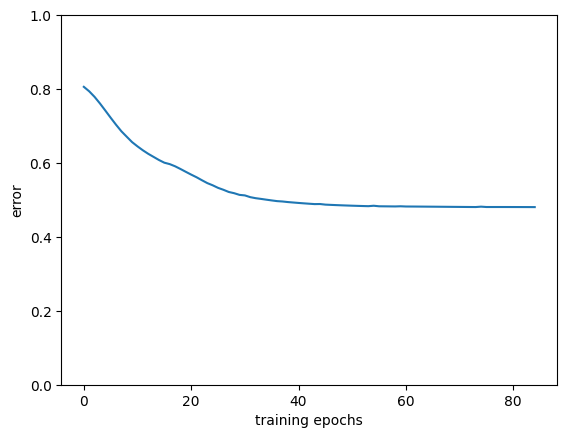

In [11]:
# the four input cases form our training data
train_X = np.array( [[0,0],[0,1],[1,0],[1,1]])
# and her eare the labels our network should learn for the XOR problem
xor_y = np.array([0,1,1,0])
train_y= xor_y

# these arrays will store the success rate for different numbers of nodes
#hidden_layer_width = [1,2,3,4,5,6,7,8,9]
#xor_success = np.zeros(9)

# at present jsut do one run for with two nodes in the hidden layer
numHiddenNodes = 2


# one hidden layer with one hidden layer of numHiddenNodes neurons with logistic (sigmoid) activation and Stochastic Gradient Descent (backprop)
xorMLP =  MLPClassifier(hidden_layer_sizes=(numHiddenNodes,), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=0, 
                    learning_rate_init=.1)


xorMLP.fit(train_X, train_y)

training_accuracy = 100* xorMLP.score(train_X, train_y)
print(f"Training set accuracy: {training_accuracy}%")

lossplot=plt.plot(xorMLP.loss_curve_) 
plt.ylim((0.0,1.0))
plt.xlabel('training epochs')
plt.ylabel('error')

In [ ]:
# Edit the  array xor_success to  replace the 'dummy' values(1,6,4,8,10) with your results, i.e.  the number of times your algorithm reached 100% accuracy on the training set


plt.plot(hidden_layer_width, xor_success)

<div class = "alaert alert-warning" style="color:black">
    <h2>Activity 1.2: Visualising what the network is doing</h2>
<ol><li>Run the training cell above until you get a successful run with four nodes - i.e. one ending with training set accuracy 100%. </li>
    <li>Then run the cell below and make sure you understand what it is showing you.</li>
</ol>
<p>The top plot shows the output of the final node for different inputs.
    <ul> <li>In this case we only have the four inputs marked by circles.</li>
        <li> In use, we would apply a threshold of 0.5 to decide whether the output of the network was 1 or 0 <br>
            So the orange lines represent the decision boundaries.</li></ul
    
<p> The bottom plot shows a visualisation of the network structure and weights: 
   <ul>
        <li> The line thickness represents the magnitude of the weight</li>
       <li> The line colour indicates the sign of the weight:<br>
           Blue lines are <b>negative weights</b>, so signals down these connections will  suppress the output of the cell they lead to. <br>
           Red lines are <b> positive weights</b>- so signals down these connections will  stimulate the node they lead to.</li>
    </ul>     
    You could repeat this with a network with more nodes (e.g. 10) or perhaps with an 'unsuccessfully trained'  network to see if you spot any patterns. 
    </div>

/Users/j4-smith/GitHub/Artificial_Intelligence_1/Learning_Materials/week9/workbook9_utils.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Pastel1')


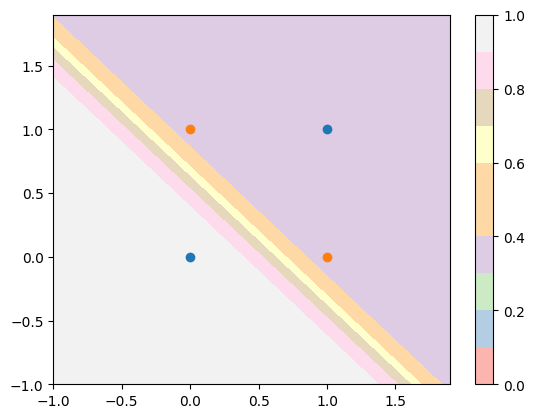

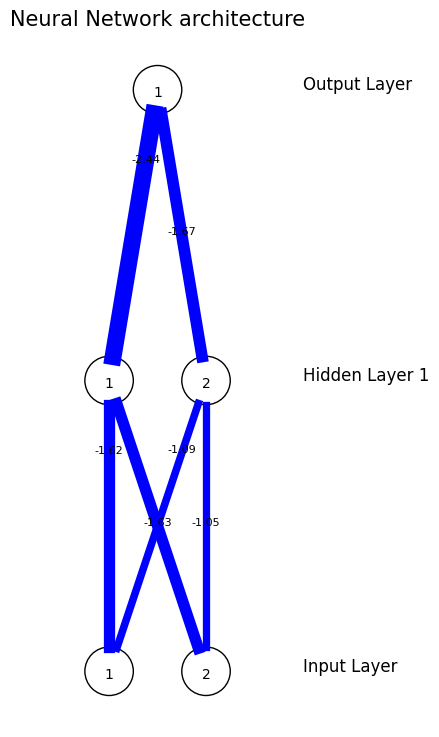

In [12]:
theMLP=xorMLP # change this line to reuse the code below for a different problem
num_output_nodes = 1 # and this one for multi-class problems

plotDecisionSurface(theMLP,train_X,train_y)


#network_structure = np.hstack(([train_X.shape[1]], np.asarray(myMLP.hidden_layer_sizes), [train_y.shape[0]]))
network_structure = np.hstack((2, np.asarray(theMLP.hidden_layer_sizes), 1))
# Draw the Neural Network with weights
network=VisNN.DrawNN(network_structure, theMLP.coefs_)
network.draw()

<div class = "alert alert-warning" style="color:black"><h1> Part 2: Using MLP for multiclass problems:  Iris data</h1></div>
<img src="./figures/cascading.png" style="float:right">

So far we have used multilayer perceptrons for learning binary (two-class) problems.  
Last week you should have discussed how you could solve a multi-class problem,  
by 'cascading' binary classifiers. 
This is shown in the image for a three class problem.  
Here the diamonds represent classifiers, each doing a "this class or not" decision.


In this part we will introduce a different idea, which is to use a  parallel classifier using softmax and one-hot encoding.

Not only is this simpler to manage, it  has the benefit that the classifiers can all share the feature creation done in previous layers






In [13]:
# run this cell to load the data


irisX,irisy = load_iris(return_X_y = True)
feature_names = ['sepal width','sepal_length','petal_width','petal_length']
irisLabels = np.array(('setosa','versicolor','virginica'))
# show what the labels look like
print(irisy)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Transforming our label data to a format for training a MLP with three output nodes
As you can see when you run the cell above, the labels is a 1-D array with labels of 0, 1, or 2.  
This is fine for models like nearest neighbours, rule sets or decision trees.  
However, (crudely speaking) the output from a neuron tends to be *off* (0) or *on*(1).  
So if we want our network to make a choice of three predictions, then we need a node for each class.

So there are two changes we make:
1. We configure the network to have three output nodes  and use 'softmax' ('winner-takes-all') activation.  
    i.e. Each node outputs a value, and we take as our final output the class whose node has the highest output signal
2. We convert our labels tell the network what *each of the nodes* should ideally output for each training example.  
   In other words:
   - if the label is 0 the then output should be [1,0,0],  
   - if the label is 1 it should be [0,1,0], and 
   - if it is 2 the output should be [0,0,1].

Sklearn comes with a module sklearn.preprocessing.onehotencoder() to do this,   
but the cell below does it explicitly to illustrate what is going on. 

I've made it generic so that you can easily reuse it for different datasets

In [14]:
# run this cell to create the one-hot version of the labels  we need for our MLP 
numcases = len(irisy)
print(f'there are {numcases} training examples')
thelabels = np.unique(irisy)
numlabels = len(thelabels)
print( f'there are {numlabels} labels: {thelabels}')

# make a 2d array with numcases rows. and numlabels columns
irisy_onehot = np.zeros((numcases,numlabels))


# Now loop through the rows of the new array setting the appropriate column value to 1
for row in range(numcases):
    label = irisy[row]
    irisy_onehot[row][label]= 1

print('This is what  rows 45-55 of the one-hot version of the labels look like')
print(irisy_onehot[44:55,:])

there are 150 training examples
there are 3 labels: [0 1 2]
This is what  rows 45-55 of the one-hot version of the labels look like
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


### Splitting our data into a training and a test set
As you can see from the output of the cells above, the iris data has groups all the classes i.e. rows 0-49 are 'iris-setosa', 50-99 are 'iris versicolor'. and rows 100-149 are 'iris-virginica'.

So if we want to train our network  and then estimate how well it will do on new data, we need to split this into a training and test set.  
Again, we could do this manually:
- first shuffling the rows so that we got a mixture of classes, 
- then taking the first part of the data for training and the second for testing.

If the data are not so well organised, or the numbers of examples of different classes are not roughly equal, then that code gets trickier.  
So the cell below shows how to do this using a method from sklearn.   
The parameters are, in order:
- the feature values (irisx)
- the onehot-encoded set of labels (irisy_onehot)
- what proportion of our data we holdback from training, so we can use it for test. We'll use 1/3rd ( test_size=0.33)
- the array holding the labels that we want to be evenly represented in both our training and test sets. (stratify=irisy_onehot)

This function returns the four different arrays - train and test, x and y.  
Noe that this function also works if your data is not one-hot encoded - it figures that out for itself.

In [15]:

iris_train_X, iris_test_X, iris_train_y, iris_test_y = train_test_split(irisX,irisy_onehot, test_size=0.33, stratify=irisy_onehot )


<div class = "alert alert-warning" style = "color:black">
    <h2>Activity 2.1 Training a MLP to learn the iris classification problem.</h2>
<ol>
    <li> Start by using the  settings for the MLPClassifier that we had before and just change the size of the hidden layer to five or ten </li>
   <ul> 
       <li> You will probably see that the training stops making improvements before the problem has been fully learned.</li>
       <li> This is an example of the backpropagation getting 'stuck' in a **local optimum** (we'll talk about these more next week). </li>
        <li> It happens becuase the basic 'stochastic gradient descent' algorithm *'sgd'* is a local search method with only crude methods for getting out of 'traps'.</li> 
       <li> Try changing the solver to 'adam' and see if this gives better performance. </li>
    </ul>
    <p><b>Remember</b> to run a few times with each setting because this is a randomised algorithm and the random set of initial weights makes a huge difference.  </p>
    <p><b>Question</b> What do you understand by <it>"better"</it> performance?</p><p></p>

<li> Now try adding a second hidden layer - for example by changing that parameter in the constructor to <it>hidden_layer_sizes=(3,3)</it>.<br>  
<li> Experiment with a few runs of each configuration to see if the network learns the problem more reliably with one hidden layer of 10 nodes or 2 layers of 5 nodes.</li>
</ol>  
</div>
    

number of output nodes = 3
Training set accuracy: 98.0 %
Estimated (Test set) accuracy: 96.0%

Predicted->   Setosa  Versicolor  Virginica
Actual 
setosa           16        0        0
versicolor        0       15        2
virginica         0        0       17


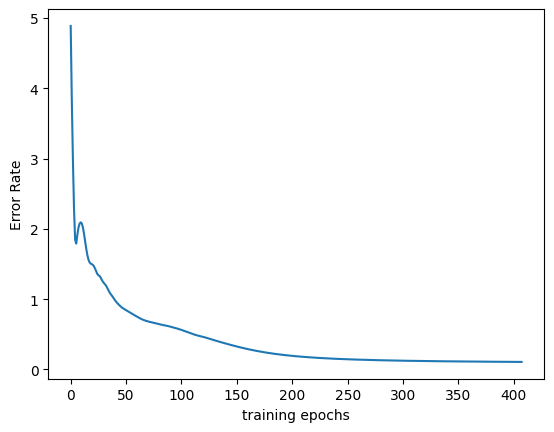

In [17]:
# create an MLP object-  you will want to change the number of hidden nodes
irisMLP =  MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=0, 
                    learning_rate_init=.05)






irisMLP.fit(iris_train_X, iris_train_y)
print('number of output nodes = ' +str(irisMLP.n_outputs_))
    
lossplot=plt.plot(irisMLP.loss_curve_)    
plt.xlabel("training epochs")
plt.ylabel("Error Rate")
# report how well it does on the training set
training_accuracy = 100* irisMLP.score(iris_train_X, iris_train_y)
print(f"Training set accuracy: {training_accuracy} %")


# now how good is our network at predicting data it has never seen before
test_accuracy = 100* irisMLP.score(iris_test_X, iris_test_y)
print(f"Estimated (Test set) accuracy: {test_accuracy}%")

# this bit of code prints a simple confusion matrix showing how the predicted labels correspond to the 'real' ones
predictions=irisMLP.predict(iris_test_X)
confusion = np.zeros((3,3))
for row in range (predictions.shape[0]):
    actual = np.argmax(iris_test_y[row])
    predicted = np.argmax(predictions[row])
    confusion [actual] [predicted] += 1

print( '\nPredicted->   Setosa  Versicolor  Virginica')
print( 'Actual ')
for i in range(3):
    print( f'{irisLabels[i]:<10}       {confusion[i][0]:2.0f}       {confusion[i][1]:2.0f}       {confusion[i][2]:2.0f}')


<div class="alert alert-warning" style="color:black"><h2> Activity 2.2 Discussion</h2>
Try to come up with answers to these questions. (these are the sorts of things you might be asked in an exam)
<ol>
    <li>Why is the test accuracy sometimes much lower than the training accuracy?</li>
     <li>Why is it sometimes less reliable train a network with multiple hidden layers when learning the iris data?  <br>
Hint: how many connections are you trying to learn?  <br>How much data have you got?</li>
    </ol></div>

<div class= "alert alert-warning" style="color:black"><h2>Activity2.3 (stretch): Does it help if you normalise the data like we did in week 6?</h2>
<p>In Activity 2.3 of the unsupervised learning tutorial (workbook6) we used a Minmax scaler so that each feature was transformed to the range (0,1).</p>
<p>    Reusing snippets of code from that workbook,  try adding a few lines to the cell at the start of this section (Part 2), so that scaling gets applied to irisX before you make the call to train_test_split().<br>
    Does this improve learning?</p>
    </div>

<div class="alert alert-warning" style="color:black"><h1> Part 3: Learning to recognise hand-written digits:  MNIST</h1></div>





<div class = "alert alert-warning" style= "color:black"><h2>Activity 3.1: Loading and visualising the data</h2>
<ol>
    <li> Run <b>ONE</b> of the next two cells depending on whether you are using csctcloud or your own installation</li>
    <li> Then run the third cell to visualise the data.</li>
    </ol>
</div>   

### Run the next cell if you are on csctcloud

In [ ]:
### Only  Run this cell if you are using the ccstcloud server
# example code to run on the server using a copy of the data that I have already downloaded and made available.
#label is column 0
# pixel values are from 0-255 so need to be scaled to 0-1

import numpy as np
test = np.genfromtxt("/home/common/datasets/mninst/mnist_test.csv",delimiter=',') 
X_test = test[:, 1:785] /255 
y_test = test[ : , 0]

train = np.genfromtxt("/home/common/datasets/mninst/mnist_train.csv",delimiter=',')
X_train = train[ : , 1:785]/255
y_train = train[ : , 0]

print(f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns, y_train has {y_train.shape} entries,\nX_test has shape {X_test.shape} y_test has {len(y_test)} entries.")
      

### Run the next cell if you are NOT on csctcloud

In [ ]:
## Only run this cell to load the data  if you are on your own machine

# the data to download is about 33Mb 
# so I've put this code in its own cell so you can just do it once.
from sklearn.datasets import fetch_openml

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True,cache=True,data_home="data")
X = X.to_numpy()
y = y.to_numpy()
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]


print(f'data loaded and saved locally with sizes ')

This cell  shows us some example images

In [ ]:
# display ten random images from each class
print(f'The test data has {X_test.shape[0]} images, each described as a {X_test.shape[1]} features (pixel values)')



plt.figure(figsize=(10, 10))

for label in range(10):
    imagesForLabel= np.empty((0,784))
    examples=0
    next=0
    while(examples <5):
        if (int(y_test[next])==int(label)):
            imagesForLabel = np.vstack((imagesForLabel, X_test[next]))
            examples +=1
        next += 1
    for col in range(5):
        exampleplot = plt.subplot(10, 5, (label*5 +col+1) )
        exampleplot.imshow(imagesForLabel[col].reshape(28, 28), 
                   cmap=plt.cm.gray)
plt.show()

<div class= "alert alert-warning" style = "color:black"> <h2>Activity 3.2 : Visualising what features the hidden layers learn to respond to.</h2> 
    <p>We will now configure a multilayer perceptron  and training it with all 60,000 images from the standard MNIST training set.</p>

<p>The idea for you to learn here, is that each hidden node is effectively acting as a feature detector. <br>
  <ol>
      <li> So let's consider just one hidden layer node: 
          <ul>
           <li> and a simple pattern where the weights from pixels in the top left and bottom right quadrant are all +1, </li>
            <li> and the weights from pixels in the top-right and bottom-left quadrants are all -1.</li>
          </ul> 
      </li>
      <li> Now consider an input image that has some constant value for every pixel (feature) - i.e. is all the same colour. 
          <ul>
             <li> When these inputs to the node  are multiplied by their weights and summed, they will cancel each other.</li>
             <li> So the <b> weighted sum </b> will be zero,</li>
            <li> and the <b>output</b> of the node  will be sigmoid(0) = 0.5, which we class as 0</li>
          </ul>
      </li>
     <li> Next consider an the image  of a simple 'chequer' pattern with  white (255) in the top-left and bottom-right quadrants,  
  and black (0)  in the other two.
         <ul>
          <li>In this case  the pattern of  pixel intensities (features) in the image  maches match the pattern in the weights.</li>
             <li>So then the weighted sum will be at its maximum, and the <b>node will output +1.<b></li>
         </ul>
             </ol>
         <p>So we can consider our hidden node is acting as a 'feature detector' for the checker pattern.<br>
             And in general <b>each</b> hidden node is a feature detector that  <b>learns</b> to recognise useful patterns during training.<br>
             And hidden nodes in the 2nd,3rd,...nth layers build complex features out of those recognised by the layer before.</p>
<p>
  <b>Run</b> the next set of cells to:<ul>
<li> Set up and train the network with 16 nodes (a number chosen so we can visualise them neatly in a grid). </li>
         <li> Then output the pattern  weights from each of the nodes as an image.</li></ul>
      </p></div>

<div class="alert alert-block alert-info"> In year 2, the Machine Learning module will explain how this concept of feature detectors has been extended  in Deep Convolutional Networks. <br>
In these features (called 'filters') can be a smaller size than the image and a process of Convolution (rather than straighforward multiplying) lets them detect small local features anywhere in the image.<br>  Convolutional Neural Networks have completely revolutionised the field of image processing and AI for visual tasks.</div>


In [ ]:
# Set up and train network
import warnings
from sklearn.exceptions import ConvergenceWarning

numHiddenNodes = 20
mlp = MLPClassifier(hidden_layer_sizes=(numHiddenNodes), early_stopping=True, verbose=1)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

print(f"Training set accuracy: {100*mlp.score(X_train, y_train)}%")
print(f"Test set accuracy: {100*mlp.score(X_test, y_test)}%")

In [ ]:
# get the weights from the input nodes to the first hidden layer
coef = mlp.coefs_.copy()[0].T

print(coef[0].max(), coef[0].min())

# find endpoints to use for scaling colour range
scalemax = coef.max() #*0.75
scalemin = coef.min() #*0.75

plt.figure(figsize=(10, 10))
numRows=4
numCols=5

for i in range(numHiddenNodes):
    l1_plot = plt.subplot(numRows, numCols, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), 
                   cmap=plt.cm.seismic, vmin=scalemin, vmax=scalemax)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    #l1_plot.set_xlabel('Hidden Node %i' % i)
title= 'Learned weights from pixels to each hidden node which correspond to patterns the nodes have been trained to respond to.\n'
title=title+'Looking at a hidden node:\n    Parts of the image where a node has weights coloured white (0.0) are ignored.\n'
title = title + '    Blue [red] indicates negative [positive] weights: signals from these pixels suppress [stimulate] the node.\n'
title = title + '    so a sensitive (red) areas might have a blue border to mark whereit must have an edge'
title= title +  '    Remember that each node could have positive or negative effect on each output node'

_=plt.suptitle(title,x=0.15,horizontalalignment='left')

<div class = "alert alert-warning" style="color:black"><h2> Activity 3.3: Discussion / Thought exercuses </h2>
Iris is a simple problems with only 4 features and three classes.

MNIST is a much more complicated problem with 784 features and ten classes - some of which (e.g. 4s and sevens) can be drawn in completely different ways.
<p>
    <b>Questions:</b><ol>
    <li>So how come the accuracy is roughly the same on these two problems?</li>
    <li> The MNIST MLP you just trained and visualised has 10 nodes in its output layer, each receving numHiddenNodes (16) input signals. <br>
        This means the hidden layer is effectively learning to  reducing a 784-Dimensional problems to a 16-dimensional one!<br>
        How cool is that?<br>
        From your observations of the visualisations, does it look like we even need 16 hidden nodes / dimensions/features?</li>
    </ol></p>
    </div>

<div class = "alert alert-warning" style="color:black"> <h2>Activity 3.4: examining the effect of having less data.</h2>
<p>The code in the cell below has a loop which trains a newtwork with different amounts of trainig data, and reports the training and test accuracy for each rin. </p>
<p>  Run the cell below and make note of the train and test accuracy for each different sized training data.<br>
    Make a hypothesis that explains the  patterns of changing training and test scores you see, and be ready to discuss this in class.</p></div>

In [ ]:
for trSetSize in (100,600,1000,6000,10000,50000):
    split= trSetSize/60000
    _,X_train_small,_,y_train_small = train_test_split(X_train,y_train, test_size=split,stratify=y_train)
    smallMnistMLP = MLPClassifier(hidden_layer_sizes=(16), max_iter=25, alpha=1e-4,
                    solver='sgd', verbose=0, random_state=10,
                    learning_rate_init=.1)

#put a loop of n runs here

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
        smallMnistMLP.fit(X_train_small, y_train_small)
    print(f'With a training set of {trSetSize} examples')
    print(f"    Training set accuracy: {100*smallMnistMLP.score(X_train_small, y_train_small)}%")
    print(f"    Test set accuracy: {100*smallMnistMLP.score(X_test, y_test)}%")

<div class = "alert alert-warning" style="color:black"><h2> (Stretch) Activity 3.5: Gathering evidence for your hypothesis.</h2>
<ol>
    <li> Copy and paste the code from the previous cell into the cell below. </li>
    <li> <b>Edit</b> the code by: <ul>
        <li> Adding an array called results with 4 columns and 30 rows, initialised to zero (hint: np,zeros). </li>
        <li> Adding a loop so that it runs the experiment for each training set size  5 times.</li>
        <li> saving the training and test accuracy from each run into a seperate row in your new  array.</li>
        <li> Store the training set size in results column 0, run number in column 1, training accuracy in column 2 and test accuracy in column 3.</li>
     </ul>
    <li> Use matplotlib to make a plot with training set size on the x-axis and accuracy on the y-axis</li>
        <li> Plot your results as two different lines on your plot, with error bars for each.</li>
        </ol>
        <p> <b>  HINT: google is good to find code snippets to make plots with.</b></p.</div>
        

<div class="alert alert-block alert-danger"> Please save your work (click the save icon) then shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook</div>

<div class="alert alert-block alert-danger"> Remember to download and save your work if you are not running this notebook locally.</div>